# HW3: Part c1. Pure Tensorflow Neural Network - with Auto Differentiation 

##CMPE-258: Deep Learning, Vijay Eranti
##Samer Baslan
##SJSU Spring 2021

#Reference: https://www.tensorflow.org/guide/basic_training_loops

Steps to take:
Obtain training data.
1. Define the model.
2. Define a loss function.
3. Run through the training data, calculating loss from the ideal value
4. Calculate gradients for that loss and use an optimizer to adjust the variables to fit the data.
5. Evaluate results.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Generate Data

In [ ]:
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

#A vector of random x values
x = tf.random.normal(shape = [NUM_EXAMPLES])

#Generate some noise
noise = tf.random.normal(shape = [NUM_EXAMPLES])

#Calculate y
y = x * TRUE_W + TRUE_B + noise

#Define the Model

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

In [ ]:
model = MyModel()

print("Variables:", model.variables)

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [ ]:
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [ ]:
print("Current loss: %1.6f" % loss(y, model(x)).numpy())

Current loss: 9.375607


##Define a training loop

In [ ]:
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))

  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [ ]:
model = MyModel()

Ws, bs = [], []
epochs = range(10)

def training_loop(model, x, y):
  for epoch in epochs:

    train(model, x, y, learning_rate = 0.1)

    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W = %1.2f b = %1.2f, loss = %2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=9.37561
Epoch  0: W = 4.59 b = 0.41, loss = 6.31433
Epoch  1: W = 4.26 b = 0.74, loss = 4.37460
Epoch  2: W = 3.99 b = 1.00, loss = 3.14550
Epoch  3: W = 3.79 b = 1.21, loss = 2.36667
Epoch  4: W = 3.62 b = 1.37, loss = 1.87316
Epoch  5: W = 3.48 b = 1.50, loss = 1.56043
Epoch  6: W = 3.38 b = 1.61, loss = 1.36225
Epoch  7: W = 3.29 b = 1.69, loss = 1.23667
Epoch  8: W = 3.23 b = 1.75, loss = 1.15709
Epoch  9: W = 3.17 b = 1.81, loss = 1.10665


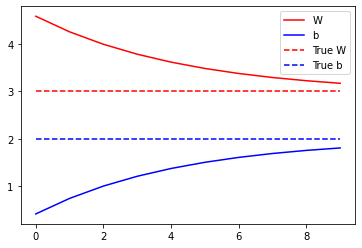

In [ ]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

#do the training
training_loop(model, x, y)

#plot it

plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

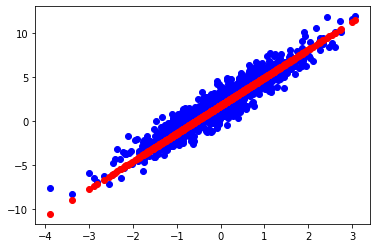

Current loss: 1.106652


In [ ]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())